<a href="https://colab.research.google.com/github/refaathassan/decision-tree/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#importing the library will used 
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [85]:
#loading the dataset and display the fisrt 5 raws of data
train_file = pd.read_csv("b_depressed.csv")
train_file.head()


,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,49647648,397715,44042267,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,23399979,80877619,74503502,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [86]:
#using the effective feature to bluid decsion tree with high accuracy 
train_file = train_file[['sex','Age','Married','Number_children','education_level','total_members','incoming_salary','incoming_own_farm','incoming_business','incoming_no_business','labor_primary','depressed']]
X =train_file[['sex','Age','Married','Number_children','education_level','total_members','incoming_salary','incoming_own_farm','incoming_business','incoming_no_business','labor_primary']] .values
#the target
y = train_file['depressed'].values
#print the first five raw in features and taraget  
print(X[:5],'\n\n',y[:5])

[[ 1 28  1  4 10  5  0  0  0  0  0]
 [ 1 23  1  3  8  5  0  0  0  0  0]
 [ 1 22  1  3  9  5  0  0  0  0  0]
 [ 1 27  1  2 10  4  0  1  0  1  0]
 [ 0 59  0  4 10  6  1  0  0  0  1]] 

 [0 1 0 0 0]


In [87]:
#split the data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [88]:
#build the model  with max depth five 
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

In [89]:
#fit the model with train data
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
#predict the target with test data to check the accuracy of model 
predTree = drugTree.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8111888111888111


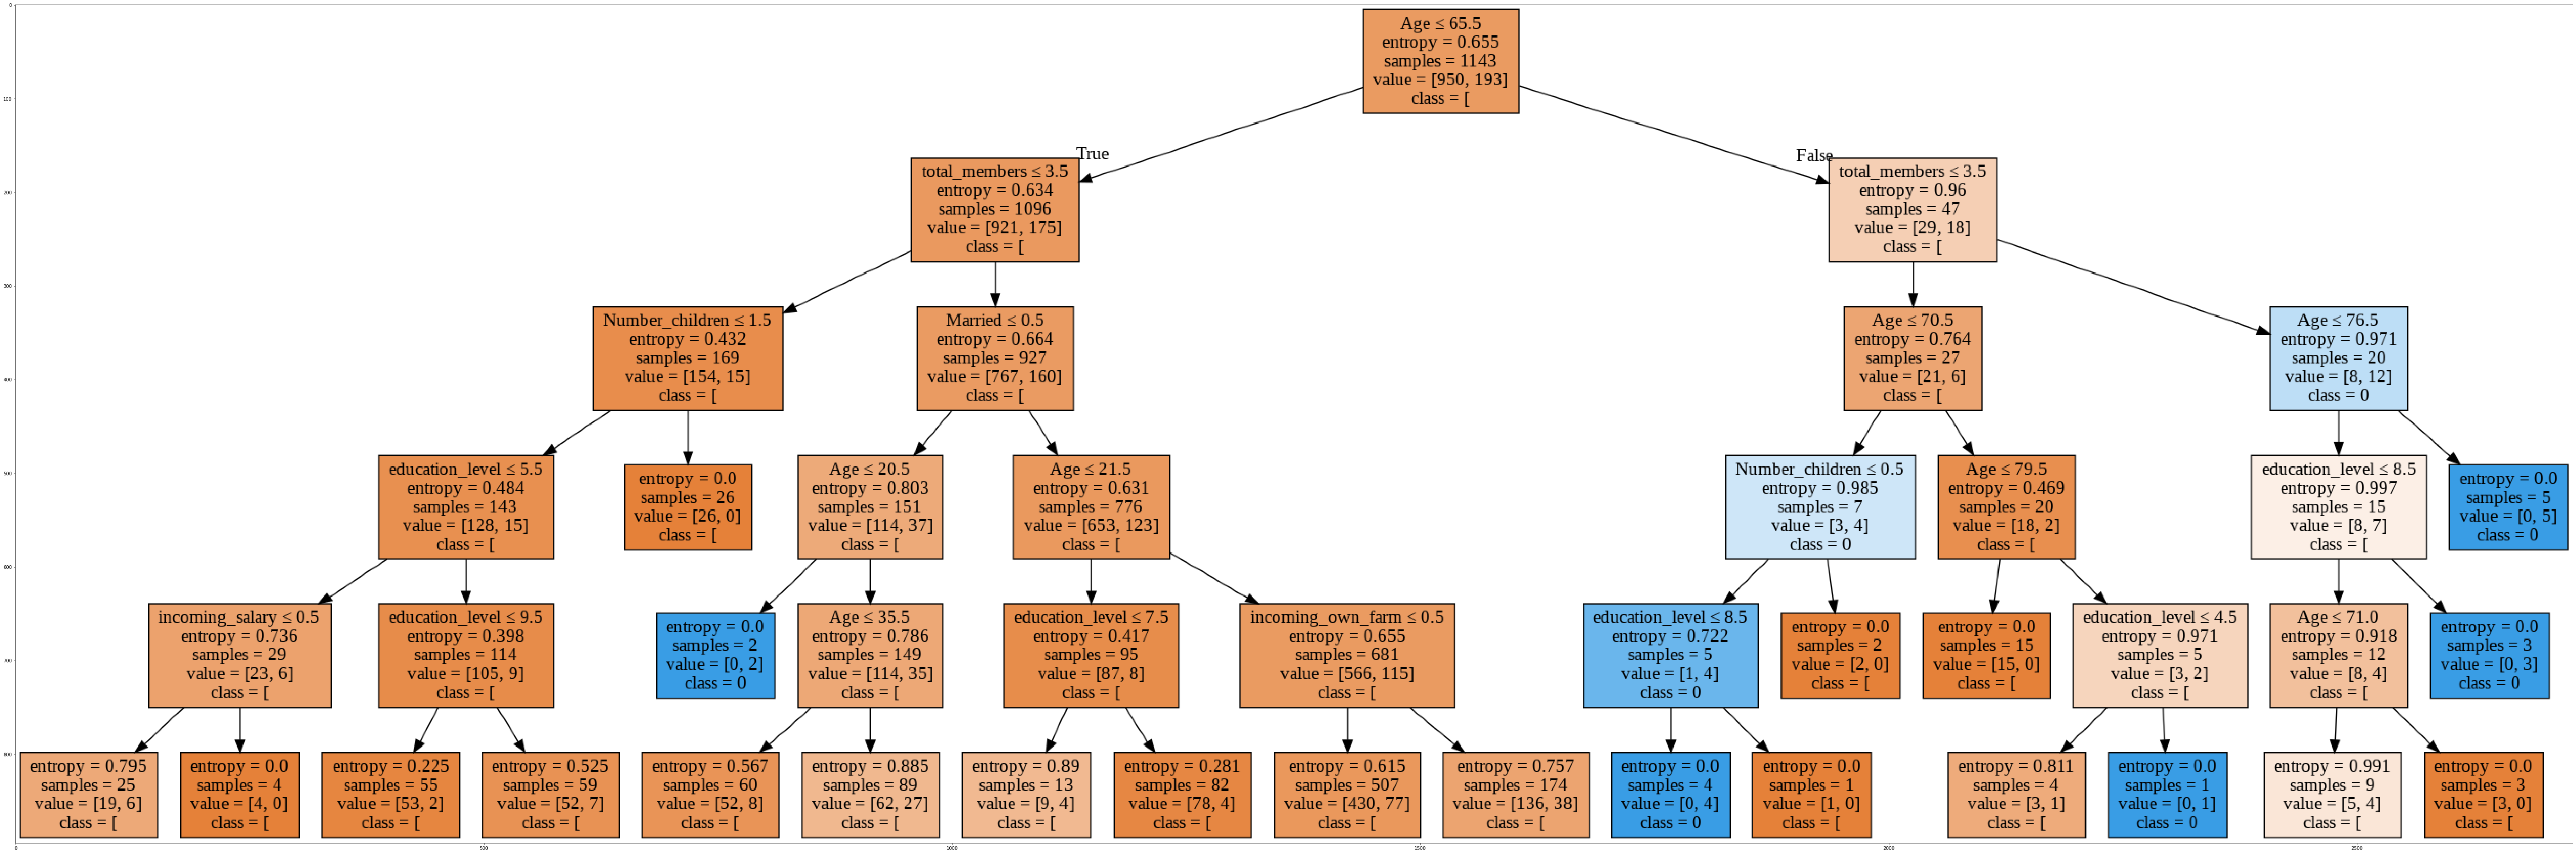

In [95]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = train_file.columns[0:11]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y_train)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')